In [3]:
print('hello')

hello


In [7]:
import pandas as pd
import numpy as np
import math
#import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Import curve fitting package from scipy
from sklearn.linear_model import LinearRegression

#define print_df()

def print_all_df(df):
    # Permanently changes the pandas settings
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', -1)
    
    # All dataframes hereafter reflect these changes.
    display(df)
    
    print('**RESET_OPTIONS**')
    
    # Resets the options
    pd.reset_option('all')

def determine_experimental_number(slice):

    #build list for experimental labels in plots
    experimental_list = list(slice)
    experimental_list = experimental_list[10:]
    # using list comprehension + enumerate()
    # to remove duplicated 
    # from list 
    res = [i for n, i in enumerate(experimental_list) if i not in experimental_list[:n]]
    experimental_list = res

    # determine experiments

    if "Well" and "nan" and "FITC" and "Blank" in experimental_list:

        experimental_list.remove("Well")
        experimental_list.remove(np.NaN)
        experimental_list.remove("FITC")
        experimental_list.remove("Blank")
        num_of_experiments = len(experimental_list)

        print("The number of experimental variants in the data appears to be "+ str(num_of_experiments) + " minus 'Well', 'nan', FITC, Blank")
        print("experimental_list = " + str(experimental_list))

        # insert Standards and Blanks to experimental lists
        experimental_list.insert(0, "Blanks")
        experimental_list.insert(0, "Standards")

        return num_of_experiments, experimental_list
    
    else:
        KeyError("Data doesn't appear to be have been formatted correctly")


def slice_dataframe_based_on_experimental_number(num_of_experiments, raw_data):
    """"Slices data frame based on the experimental number."""
    """ Assumes gap of three rows between MG and GFP with GFP underneath """
    """ Includes negative control in experimental number """

    metadataheader = 2
    fitc_stnds = 8
    blank = 3
    gap = 3
    triplicate = 3

    mg_slicefactor = (num_of_experiments * triplicate) + metadataheader + fitc_stnds + blank
    gfp_slicefactor = mg_slicefactor + gap

    mg = raw_data.iloc[:mg_slicefactor,:]
    gfp = raw_data.iloc[gfp_slicefactor:,:]
    
    return gfp

def import_data(filename):
    data = pd.read_csv(filename, header=None)

    date = data.iloc[0,1]
    metadata = data.iloc[:3,:3]

    data = data.iloc[5:,:]
    data.reset_index(inplace=True)
    data = data.iloc[:,1:]

    keys = ['date', 'metadata','raw_data']
    values = [date, metadata, data]

    data_dict = {keys: values for keys, values in zip(keys, values)}
    return data_dict

In [12]:
raw_package_dict = import_data('dataset.CSV')

#get raw data from dictionary
raw_data = raw_package_dict['raw_data']


#get time list
time = list(raw_data.iloc[raw_data[raw_data.iloc[:,1]=='Time'].index[0],:])
#delete inital nan

if math.isnan(float(time[0])) == True:
    del time[0]
    del time[0]
    print('Time list is ready, deleted nan and time')
elif time[0] == 'Time':
    del time[0]
    print('Time list is ready, deleted time')
elif time[0] == '0 h ':
    print('Time list is ready')
else:
    print('Time list is weird')

print(time)

Time list is ready, deleted nan and time
['0 h ', '0 h 2 min', '0 h 4 min', '0 h 6 min', '0 h 8 min', '0 h 10 min', '0 h 12 min', '0 h 14 min', '0 h 16 min', '0 h 18 min', '0 h 20 min', '0 h 22 min', '0 h 24 min', '0 h 26 min', '0 h 28 min', '0 h 30 min', '0 h 32 min', '0 h 34 min', '0 h 36 min', '0 h 38 min', '0 h 40 min', '0 h 42 min', '0 h 44 min', '0 h 46 min', '0 h 48 min', '0 h 50 min', '0 h 52 min', '0 h 54 min', '0 h 56 min', '0 h 58 min', '1 h ', '1 h 2 min', '1 h 4 min', '1 h 6 min', '1 h 8 min', '1 h 10 min', '1 h 12 min', '1 h 14 min', '1 h 16 min', '1 h 18 min', '1 h 20 min', '1 h 22 min', '1 h 24 min', '1 h 26 min', '1 h 28 min', '1 h 30 min', '1 h 32 min', '1 h 34 min', '1 h 36 min', '1 h 38 min', '1 h 40 min', '1 h 42 min', '1 h 44 min', '1 h 46 min', '1 h 48 min', '1 h 50 min', '1 h 52 min', '1 h 54 min', '1 h 56 min', '1 h 58 min', '2 h ', '2 h 2 min', '2 h 4 min', '2 h 6 min', '2 h 8 min', '2 h 10 min', '2 h 12 min', '2 h 14 min', '2 h 16 min', '2 h 18 min', '2 h 20 

In [17]:
minute_list= []

for i in time:
    #sets the first character of the string as a numeric
    a = int(str(i)[0])

    if len(i) == 4:
        # if the time is a single hour, e.g. '2 h', multiply the first character by 60 and return
        hour = int(str(i)[0]) * 60
        # addition
        total_time = hour
        # add to list
        minute_list.append(total_time)

    if len(i) == 5:
        # if the time is a single hour, e.g. '2 h', multiply the first character by 60 and return
        hour = int(str(i)[0:2]) * 60
        # addition
        total_time = hour
        # add to list
        minute_list.append(total_time)
    
    elif len(i) == 9:
        # multiply the first character by 60
        hour = int(str(i)[0]) * 60
        # save the fifth character
        minute = int(str(i)[4])
        # addition
        total_time = hour + minute
        # add to list
        minute_list.append(total_time)
    
    elif len(i) == 10:
        #if the first number is a less than 10 (1 not 11)
        if i[1].isspace():
            # multiply the first character by 60
            hour = int(str(i)[0]) * 60
            # save the fifth and sixth characters
            minute = int(str(i)[4:6])
            # addition
            total_time = hour + minute
            # add to list
            minute_list.append(total_time)
        else:
            # multiply the first character by 60
            hour = int(str(i)[0:2]) * 60
            # save the fifth and sixth characters
            minute = int(str(i)[5])
            # addition
            total_time = hour + minute
            # add to list
            minute_list.append(total_time)

    elif len(i) == 11:
        # multiply the first character by 60
        hour = int(str(i)[0:2]) * 60
        # save the fifth and sixth characters
        minute = int(str(i)[5:7])
        # addition
        total_time = hour + minute
        # add to list
        minute_list.append(total_time)


minute_list.insert(0,'Time (Mins)')
minute_list.insert(0,'Sample')

def add_time(df, time_list):

    #check index correct
    df.reset_index(inplace=True)
    df = df.iloc[:,1:]

    #delete spectral and time row if necessary
    while df.iloc[0,1] != "Time":
        #print_all_df(df)
        df = df.iloc[1:,:]
        df.reset_index(inplace=True)
        df = df.iloc[:,1:]

    #insert the minute lists
    df.iloc[0,:] = minute_list

    return df


raw_data = add_time(raw_data, minute_list)

print_all_df(raw_data)






/tmp/ipykernel_768/2309633988.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362
0,Sample,Time (Mins),0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72,74,76,78,80,82,84,86,88,90,92,94,96,98,100,102,104,106,108,110,112,114,116,118,120,122,124,126,128,130,132,134,136,138,140,142,144,146,148,150,152,154,156,158,160,162,164,166,168,170,172,174,176,178,180,182,184,186,188,190,192,194,196,198,200,202,204,206,208,210,212,214,216,218,220,222,224,226,228,230,232,234,236,238,240,242,244,246,248,250,252,254,256,258,260,262,264,266,268,270,272,274,276,278,280,282,284,286,288,290,292,294,296,298,300,302,304,306,308,310,312,314,316,318,320,322,324,326,328,330,332,334,336,338,340,342,344,346,348,350,352,354,356,358,360,362,364,366,368,370,372,374,376,378,380,382,384,386,388,390,392,394,396,398,400,402,404,406,408,410,412,414,416,418,420,422,424,426,428,430,432,434,436,438,440,442,444,446,448,450,452,454,456,458,460,462,464,466,468,470,472,474,476,478,480,482,484,486,488,490,492,494,496,498,500,502,504,506,508,510,512,514,516,518,520,522,524,526,528,530,532,534,536,538,540,542,544,546,548,550,552,554,556,558,560,562,564,566,568,570,572,574,576,578,580,582,584,586,588,590,592,594,596,598,600,602,604,606,608,610,612,614,616,618,620,622,624,626,628,630,632,634,636,638,640,642,644,646,648,650,652,654,656,658,660,662,664,666,668,670,672,674,676,678,680,682,684,686,688,690,692,694,696,698,700,702,704,706,708,710,712,714,716,718,720
1,C19,Sample X1,4698,4710,4777,4756,4723,4710,4699,4583,4607,4560,4508,4566,4591,4568,4598,4638,4670,4716,4670,4727,4777,4682,4737,4806,4804,4795,4835,4865,4824,4845,4897,4888,4903,4931,4929,4923,4913,4879,4899,4918,4919,4937,4942,4912,4902,4909,4910,4916,4910,4914,4893,4932,4930,4920,4977,4971,5012,4976,4973,4953,4959,4989,4990,4973,5021,5032,5015,5000,4987,4962,4999,4990,4982,5004,5002,4979,4982,5041,5016,4997,5025,5041,4976,5013,4980,4990,5006,5020,5008,5039,5040,5052,4978,5076,5074,5072,5013,5059,4995,5058,5048,5067,5050,5064,5056,5029,5075,4988,4948,5011,4946,4998,4971,4974,5026,4937,4969,4989,4983,4812,4798,4809,4793,4835,4857,4918,4943,5104,5763,7319,7700,7532,7632,7638,7635,7661,7618,7667,7656,7719,7641,7599,7742,7679,7732,7707,7656,7677,7674,7639,7720,7671,7668,7686,7626,7699,7624,7654,7613,7625,7618,7605,7619,7618,7602,7607,7520,7546,7592,7583,7615,7559,7542,7515,7543,7509,7568,7559,7450,7553,7518,7478,7498,7401,7498,7512,7505,7478,7577,7413,7392,7423,7449,7432,7414,7393,7414,7404,7370,7425,7422,7432,7383,7344,7328,7295,7363,7359,7330,7314,7315,7287,7227,7227,7259,7398,7400,7400,7316,7282,7384,7342,7427,7281,7323,7448,7249,7299,7315,7240,7213,7189,7313,7325,7334,7248,7255,7246,7258,7243,7266,7203,7196,7243,7180,7153,7

**RESET_OPTIONS**
As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.

: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



/usr/local/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead.
  warnings.warn(d.msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/pandas/_config/config.py:630: FutureWarning: 
: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.

  warnings.warn(d.msg, FutureWarning)


In [18]:

def reorder(df):
    #flip the dataframe - easier for plotting
    plot_df = df.transpose()

    #rename columns
    cols = plot_df.iloc[plot_df[plot_df.iloc[:,0]=='Time (Mins)'].index[0],:]
    plot_df.columns = list(cols)


    #get rid of experimental samples and well names
    while plot_df.iloc[0,0] != 0:
        #print_all_df(df)
        plot_df = plot_df.iloc[1:,:]
        plot_df.reset_index(inplace=True)
        plot_df = plot_df.iloc[:,1:]

    

    plot_df.reset_index(inplace=True)
    plot_df = plot_df.iloc[:,1:]


    #numeric conversion
    for i in range(len(plot_df.columns)):
        plot_df.iloc[:,i] = plot_df.iloc[:,i].astype(float)

 
    return plot_df


data = reorder(raw_data)


In [46]:
def divide_samples(plot_df):

    #Separate samples depending on number of experiments

    #isolate calibrants
    fitc = plot_df[['Sample X1', 'Sample X2', 'Sample X3', 'Sample X4', 'Sample X5', 'Sample X6', 'Sample X7', 'Sample X8']].copy()

    #blank
    blank_df = plot_df[['Sample X9', 'Sample X10', 'Sample X11']].copy()

    neg_df = plot_df[['Sample X12', 'Sample X13']].copy()

    if num_of_experiments == 2:
        sample1_df = plot_df[['Sample X15', 'Sample X16', 'Sample X17']].copy()
        return [fitc, blank_df, neg_df, sample1_df]

    elif num_of_experiments == 3:
        sample1_df = plot_df[['Sample X15', 'Sample X16']].copy()
        sample2_df = plot_df[['Sample X18', 'Sample X19']].copy()
        return [fitc, blank_df, neg_df, sample1_df, sample2_df]

    else:
        print('not sure if amount of experiments matches up')

num_of_experiments = 3
experimental_list = ['Blanks', 'Standards', 'BL21-DE3 SY - template', 'RosettaGami + mNG', 'BL21-DE3 SY + mNG']
gfp_list = divide_samples(data)

print(len(experimental_list))
print(len(gfp_list))
#name the dataframes for use in labelling plots later
for (df, i) in zip(gfp_list, experimental_list):
    df.name = i


5
5


In [47]:
def zormalise(fitc, blank_df, neg_df, sample1_df, sample2_df, sample3_df, sample4_df):

    ##########normalise

    # average
    blank_df['Mean'] = blank_df.mean(axis=1)

    neg_df['Mean'] = neg_df.mean(axis=1)

    sample1_df['Mean'] = sample1_df.mean(axis=1)
    sample2_df['Mean'] = sample2_df.mean(axis=1)
    sample3_df['Mean'] = sample3_df.mean(axis=1)
    sample4_df['Mean'] = sample4_df.mean(axis=1)

    # normalise
    neg_df['Normalised'] = neg_df['Mean'] - blank_df['Mean']

    sample1_df['Normalised'] = sample1_df['Mean'] - blank_df['Mean']
    sample2_df['Normalised'] = sample2_df['Mean'] - blank_df['Mean']
    sample3_df['Normalised'] = sample3_df['Mean'] - blank_df['Mean']
    sample4_df['Normalised'] = sample4_df['Mean'] - blank_df['Mean']

    return [fitc, blank_df, neg_df, sample1_df, sample2_df, sample3_df, sample4_df]

# attempt to automate update process. Won't accept df stored in list. Should probably use dictionaries.

#def normalise_items(df_list):
#    for i in df_list:
#        df_list[i] = normalise(df_list[i])
    
#    return df_list


#gfp_new = normalise_items(gfp_list)

#gfp_list = normalise(gfp_list[0], gfp_list[1], gfp_list[2], gfp_list[3], gfp_list[4], gfp_list[5], gfp_list[6])
#mg_list = normalise(mg_list[0], mg_list[1], mg_list[2], mg_list[3], mg_list[4], mg_list[5], mg_list[6])


def normalise(thelist):

    ##########normalise

    # average
    #blank
    thelist[1]['Mean'] = thelist[1].mean(axis=1)

    for i in range(2, len(thelist)):
        thelist[i]['Mean'] = thelist[i].mean(axis=1)

    # normalise
    for i in range(2, len(thelist)):
        thelist[i]['Normalised'] = thelist[i]['Mean'] - thelist[1]['Mean']

    return thelist

gfp_list = normalise(gfp_list)


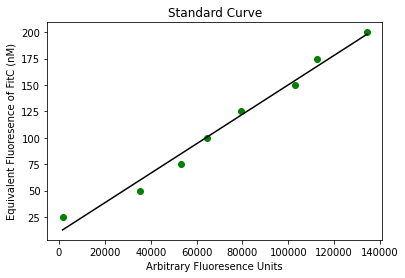

coefficient of determination: 0.9832343930663652
slope: 0.0013953005235365725


In [48]:
################# Standard Curve
def check_coefficient(thelist, concs):
        #normalise. Subtract Blank Mean
        fitc_n = thelist[0].subtract(thelist[1]['Mean'], axis=0)
        # fit curves
        #function for looping?
        model = LinearRegression()
        # fitc data in to array and reverse the order
        x = np.array(fitc_n.iloc[0,:]).reshape(-1,1)
        # List of nM concs into array
        y = np.array(ul_list).reshape(-1,1)
        x = np.flip(x, axis=0)
        x = x.reshape(-1,1)
        model.fit(x,y)
        coefficient = float(model.coef_)
        return coefficient

def standardcurve(thelist, concs):

        #normalise. Subtract Blank Mean
        fitc_n = thelist[0].subtract(thelist[1]['Mean'], axis=0)


        # fit curves
        #function for looping?
        model = LinearRegression()
        # fitc data in to array and reverse the order
        x = np.array(fitc_n.iloc[0,:]).reshape(-1,1)

        # List of nM concs into array
        y = np.array(ul_list).reshape(-1,1)

        x = np.flip(x, axis=0)
        x = x.reshape(-1,1)

        # Fit
        model.fit(x,y)

        #Plot
        plt.scatter(x, y, color='g')
        plt.plot(x, model.predict(x), color='k')
        plt.title('Standard Curve')
        plt.xlabel('Arbitrary Fluoresence Units')
        plt.ylabel('Equivalent Fluoresence of FitC (nM)')
        plt.show()

        # intercept = float(model.intercept_)
        coefficient = float(model.coef_)
        r_sq = model.score(x, y)
        print('coefficient of determination:', r_sq)
        #print('intercept:', model.intercept_)
        print('slope:', coefficient)

        

        return thelist, model

ul_list = [25, 50,75, 100, 125, 150,175,200]

#checks if the conc list needs to be flipped and excutes accordingly

if check_coefficient(gfp_list, ul_list) > 0:
    gfp_list, model = standardcurve(gfp_list, ul_list)

elif check_coefficient(gfp_list, ul_list) < 0:
    ul_list.reverse()
    gfp_list, model = standardcurve(gfp_list, ul_list)
    


In [49]:
# Convert to FitC using standard Curve

def convert(fitc, blank_df, neg_df, sample1_df, sample2_df,  sample3_df, sample4_df, model):
    # Controls

    neg_df['N in FITC'] = model.predict(np.array(neg_df['Normalised']).reshape(-1,1))

    # Samples
    sample1_df['N in FITC'] = model.predict(np.array(sample1_df['Normalised']).reshape(-1,1))
    sample2_df['N in FITC'] = model.predict(np.array(sample2_df['Normalised']).reshape(-1,1))
    sample3_df['N in FITC'] = model.predict(np.array(sample3_df['Normalised']).reshape(-1,1))
    sample4_df['N in FITC'] = model.predict(np.array(sample4_df['Normalised']).reshape(-1,1))

    return [fitc, blank_df, neg_df, sample1_df, sample2_df,  sample3_df, sample4_df, model]

#gfp_list = convert(gfp_list[0], gfp_list[1], gfp_list[2], gfp_list[3], gfp_list[4], gfp_list[5], gfp_list[6], gfp_list[7])

#mg_list = convert(mg_list[0], mg_list[1], mg_list[2], mg_list[3], mg_list[4], mg_list[5])


def convert_to_fitC(thelist, model):
    for i in range(2, len(thelist)):
        thelist[i]['N in FITC'] = model.predict(np.array(thelist[i]['Normalised']).reshape(-1,1))
    return thelist
gfp_list = convert_to_fitC(gfp_list, model)


In [50]:
print(data)

     Time (Mins)  Sample X1  Sample X2  Sample X3  Sample X4  Sample X5  \
0            0.0     4698.0    38418.0    56519.0    67538.0    82734.0   
1            2.0     4710.0    37510.0    56147.0    65581.0    79769.0   
2            4.0     4777.0    37294.0    56095.0    65121.0    78202.0   
3            6.0     4756.0    37140.0    55691.0    65248.0    78056.0   
4            8.0     4723.0    37064.0    55603.0    64613.0    77515.0   
..           ...        ...        ...        ...        ...        ...   
356        712.0     6361.0    34096.0    51502.0    60166.0    72033.0   
357        714.0     6313.0    33846.0    51523.0    60172.0    71947.0   
358        716.0     6321.0    33940.0    51549.0    60020.0    71920.0   
359        718.0     6347.0    34014.0    51747.0    59774.0    71732.0   
360        720.0     6343.0    34021.0    51639.0    59974.0    71726.0   

     Sample X6  Sample X7  Sample X8  Sample X9  ...  Sample X11  Sample X12  \
0     106316.0   11

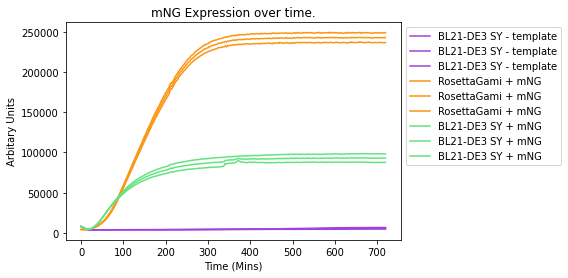

In [51]:
import numpy

def single_plot(thelist):


    for i in range(2,len(thelist)):
        plt.plot(data['Time (Mins)'], thelist[i].iloc[:,0:3], c=numpy.random.rand(3,), label = thelist[i].name)

    plt.title('mNG Expression over time.')
    plt.xlabel('Time (Mins)')
    plt.ylabel('Arbitary Units')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")

    #save
    #plt.savefig('Experimental_data.png')

    plt.show()


single_plot(gfp_list)


In [73]:
# individual fitc conversion

def fitc_conversion(thelist,model):

    #individual blank subtraction
    for i in range(2,len(thelist)):
        thelist[i]['S1 blank subtracted'] = thelist[i].iloc[:,0] - thelist[1]['Mean']
        thelist[i]['S2 blank subtracted'] = thelist[i].iloc[:,1] - thelist[1]['Mean']
    
    #individual fitc conversion
    for i in range(2,len(thelist)):
        thelist[i]['S1 in FITC'] = model.predict(np.array(thelist[i]['S1 blank subtracted']).reshape(-1,1))
        thelist[i]['S2 in FITC'] = model.predict(np.array(thelist[i]['S2 blank subtracted']).reshape(-1,1))

    #individual standard error
    for i in range(2,len(thelist)):
        # calculate Standard Error
        thelist[i]['SEM'] = thelist[i].loc[:,['S1 in FITC', 'S2 in FITC']].sem(axis=1)

    return thelist

gfp_list = fitc_conversion(gfp_list, model)
#print_all_df(gfp_list[3])
#mg_list = fitc_conversion(mg_list[0], mg_list[1], mg_list[2], mg_list[3], mg_list[4], mg_list[5])


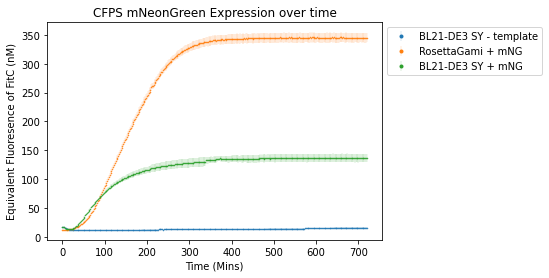

In [77]:
########################## Plot
def relative_plot_gfp(thelist):

    #make plot df list
    plots = []
    for t in range(2,len(thelist)):
        plots.append(thelist[t])


    for i,df in enumerate(plots):
        markers, caps, bars = plt.errorbar(data['Time (Mins)'], df['N in FITC'], yerr= df['SEM'], fmt="o", ms=0.5, label=df.name)
        [bar.set_alpha(0.1) for bar in bars]

    plt.title('CFPS mNeonGreen Expression over time')
    plt.xlabel('Time (Mins)')
    plt.ylabel('Equivalent Fluoresence of FitC (nM)')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left", markerscale=6)

    #save
    plt.savefig('GFP Experimental data relative axis.png', format='png')

    plt.show()

relative_plot_gfp(gfp_list)


In [ ]:
########################## Plot
def relative_plot_mg(thelist):

    #make plot df list
    plots = []
    for t in range(2,len(thelist)):
        #print(thelist[t]['Normalised'])
        plots.append(thelist[t])


    for i,df in enumerate(plots):
        plt.plot(gfp['Time (Mins)'], plots[i]['Normalised'], c=numpy.random.rand(3,), label = thelist[i].name)
        #markers, caps, bars = plt.errorbar(gfp['Time (Mins)'], df['Normalised'], yerr= df['SEM'], fmt="o", ms=0.5, label=sample_names[i])
        #[bar.set_alpha(0.1) for bar in bars]

    plt.title('mRNA Expression over time')
    plt.xlabel('Time (Mins)')
    plt.ylabel('Equivalent Fluoresence of FitC (nM)')
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")

    #save
    #plt.savefig('mRNA Experimental data relative axis.png', format='png')

#print_all_df(mg_list[3])
relative_plot_mg(mg_list)

In [ ]:
########################## Plot
def relative_plot_gfp(neg_df ,sample1_df, sample2_df):

    plots =[neg_df, sample1_df, sample2_df]

    sample_names = ['Neg Ctrl','+MG','-MG']

    for i,df in enumerate(plots):
        markers, caps, bars = plt.errorbar(gfp['Time (Mins)'], df['N in FITC'], yerr= df['SEM'], fmt="o", ms=0.5, label=sample_names[i])
        [bar.set_alpha(0.1) for bar in bars]

    plt.title('GFP Expression over time. Date: '+ str(date[5:]))
    plt.xlabel('Time (Mins)')
    plt.ylabel('Equivalent Fluoresence of FitC (nM)')
    plt.legend()

    #save
    plt.savefig('GFP Experimental data relative axis.png', format='png')

    plt.show()

relative_plot_gfp(gfp_list[2], gfp_list[3], gfp_list[4])

In [ ]:
########################## Plot

def fixed_plot(neg_df ,sample1_df, sample2_df):

    plots =[neg_df, sample1_df, sample2_df]

    sample_names = ['Neg Ctrl','+MG','-MG']

    for i,df in enumerate(plots):
        markers, caps, bars = plt.errorbar(gfp['Time (Mins)'], df['N in FITC'], yerr= df['SEM'], fmt="o", ms=0.5, label=sample_names[i])
        [bar.set_alpha(0.1) for bar in bars]

    plt.title('mRNA Expression over time. Date: '+ str(date[5:]))
    plt.xlabel('Time (Mins)')
    plt.ylabel('Equivalent Fluoresence of FitC (nM)')

    #plt.ylim(top=120)

    plt.legend()

    #save
    plt.savefig('mRNA Experimental data standard axis.png', format='png')

    plt.show()

#fixed_plot(gfp_list[2], gfp_list[3], gfp_list[4])

fixed_plot(mg_list[2], mg_list[3], mg_list[4])

In [ ]:
neg_df = gfp_list[2]
sample1_df = gfp_list[3]

neg_gfp = neg_df['N in FITC']
pos_gfp = sample1_df['N in FITC']

neg_df = mg_list[2]
sample1_df = mg_list[3]

neg_mg = neg_df['N in FITC']
pos_mg = sample1_df['N in FITC']
# creating data for plot
# data arrangement between 0 and 50
# with the difference of 2
# x-axis
x = gfp['Time (Mins)']
  
# y-axis values
ya1 = pos_gfp
ya2 = neg_gfp 
# secondary y-axis values
yb1 = pos_mg
yb2 = neg_mg
  
# plotting figures by creating aexs object
# using subplots() function
fig, ax = plt.subplots(figsize = (10, 5))
plt.title('GFP and mRNA expression. Date: '+ str(date[5:]))
  
# using the twinx() for creating another
# axes object for secondry y-Axis
ax2 = ax.twinx()
ax.plot(x, ya1, color = 'lime', label = 'GFP +DNA')
ax.plot(x, ya2, color = 'darkgreen', label = 'GFP -DNA')
ax2.plot(x, yb1, color = 'orchid', alpha = 0.4, label = 'mRNA +DNA')
ax2.plot(x, yb2, color = 'fuchsia', alpha = 0.4, label = 'mRNA -DNA')
  
# giving labels to the axises
ax.set_xlabel('Time (minutes)', color = 'r')
ax.set_ylabel('GFP in nM FITC', color = 'g')
  
# secondary y-axis label
ax2.set_ylabel('mRNA in nM FITC', color = 'fuchsia')
  
# defining display layout 
#plt.tight_layout()
plt.legend()
#plt.savefig('GFP mRNA double plot.png', format='png')
# show plot
plt.show()

In [ ]:
output = gfp_list[3].loc[:,['S1 in FITC','S2 in FITC', 'S3 in FITC']]
output['Time'] = gfp['Time (Mins)']
#output = pd.merge(left=gfp_list[0], right=gfp_list[1])
output.to_csv('dataset', index=False)